# Big Idea Final Project  
group 28 NIDASA (Nicky)  
Finding the best neighborhood in Pittsburgh through the category of public transportation

##### Metric and how it works:   
Iterate through all the data’s “current_garage” column, if the garage name is the same, add up the “on_time_percentage” and get the mean. Compared through all the means, the area that has the garage which has buses that have the highest average on-time percentage will be the best neighborhood in Pittsburgh.
##### DataSet choice: Monthly OTP by Route  
link: https://data.wprdc.org/dataset/port-authority-monthly-average-on-time-performance-by-route/resource/00eb9600-69b5-4f11-b20a-8c8ddd8cfe7a
##### point  
10 max, 0 min


In [87]:
import pandas as pd

transport = pd.read_csv("monthly_otp_by_route.csv")
data = {}

for _, row in transport.iterrows():
    current_garage = row['current_garage']
    #skip rows that is null or with missing value
    if pd.isna(current_garage):
        continue
    current_percent = float(row['on_time_percent'])
    
    if current_garage in data:
        data[current_garage]['total_percent'] += current_percent
        data[current_garage]['time'] += 1
    else:
        data[current_garage] = {'total_percent':current_percent, 'time':1}

#turn the data into DataFrame
df = pd.DataFrame([
    {'name_of_garage':garage, 'average_percent':percent['total_percent']/percent['time']}
    for garage, percent in data.items()
])

#print out the DataFrame
df

,name_of_garage,average_percent
0,Ross,0.668205
1,Collier,0.721159
2,East Liberty,0.641909
3,West Mifflin,0.650965
4,East Liberty/West Mifflin,0.716049
5,South Hills Village,0.860827


In [89]:
avg = df["average_percent"]
weighted = []
for percent in avg:
    if percent == 1:
        weighted.append(10)
    elif 0.9<=percent<1:
        weighted.append(9)
    elif 0.8<=percent<0.9:
        weighted.append(8)
    elif 0.7<=percent<0.8:
        weighted.append(7)
    elif 0.6<=percent<0.7:
        weighted.append(6)
    elif 0.5<=percent<0.6:
        weighted.append(5)
    elif 0.4<=percent<0.5:
        weighted.append(4)
    elif 0.3<=percent<0.4:
        weighted.append(3)
    elif 0.2<=percent<0.3:
        weighted.append(2)
    elif 0.1<=percent<0.2:
        weighted.append(1)
    elif 0<=percent<0.1:
        weighted.append(0)
#print(weighted)
        
df['weighted_number'] = weighted
df

,name_of_garage,average_percent,weighted_number
0,Ross,0.668205,6
1,Collier,0.721159,7
2,East Liberty,0.641909,6
3,West Mifflin,0.650965,6
4,East Liberty/West Mifflin,0.716049,7
5,South Hills Village,0.860827,8


In [91]:
#sort the data from max to min by the weighted_number
df_sort = df.sort_values(by='weighted_number', ascending =False)
df_sort

,name_of_garage,average_percent,weighted_number
5,South Hills Village,0.860827,8
1,Collier,0.721159,7
4,East Liberty/West Mifflin,0.716049,7
0,Ross,0.668205,6
2,East Liberty,0.641909,6
3,West Mifflin,0.650965,6


In [201]:
transport['year_month'] = transport['year_month'].astype(int)

spring_mask = (transport['year_month'] % 100 >= 3 )&(transport['year_month'] % 1000 <= 5 )
summer_mask = (transport['year_month'] % 100 >= 6 )&(transport['year_month'] % 1000 <= 8 )
fall_mask = (transport['year_month'] % 100 >= 9 )&(transport['year_month'] % 1000 <= 11 )
winter_mask = (transport['year_month'] % 100 == 12) | (transport['year_month'] % 100 == 1 )|(transport['year_month'] % 1000 == 2 )

spring = transport[spring_mask]
summer = transport[summer_mask]
fall = transport[fall_mask]
winter = transport[winter_mask]


In [203]:
seasons = [spring, summer, fall, winter]
sorted_seasons = []

for df in seasons:
    current_season_data = {}
    for _, row in df.iterrows():
        garage = row['current_garage']
        #skip rows that is null or with missing value
        if pd.isna(garage):
            continue
        percent = float(row['on_time_percent'])

        #initialize new garage
        if garage not in current_season_data:
            current_season_data[garage] = {'total_percent': 0, 'time': 0}
        
        #upgrade data
        current_season_data[garage]['total_percent'] += percent
        current_season_data[garage]['time'] += 1

    # Convert the current season data into a DataFrame
    current_season_df = pd.DataFrame([
        {'name_of_garage': garage, 'average_percent': data['total_percent'] / data['time']}
        for garage, data in current_season_data.items()
    ])
    
    sorted_seasons.append(current_season_df)

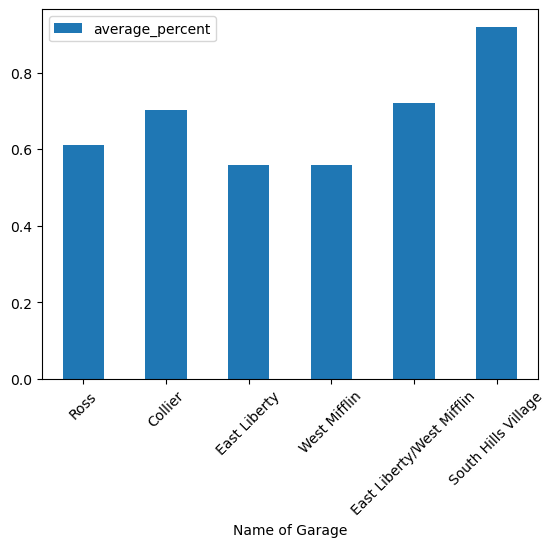

In [205]:
import matplotlib.pyplot as plt
#spring bar graph
sorted_seasons[0].set_index('name_of_garage').plot(kind='bar')
plt.xlabel('Name of Garage')
plt.xticks(rotation=45)
plt.show()

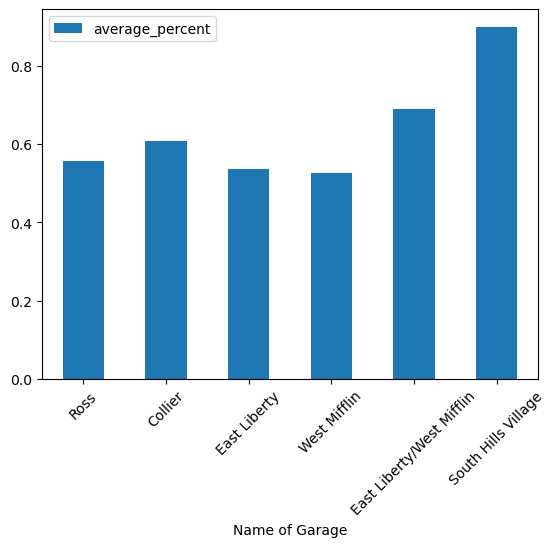

In [215]:
#summer bar graph
sorted_seasons[1].set_index('name_of_garage').plot(kind='bar')
plt.xlabel('Name of Garage')
plt.xticks(rotation=45)
plt.show()

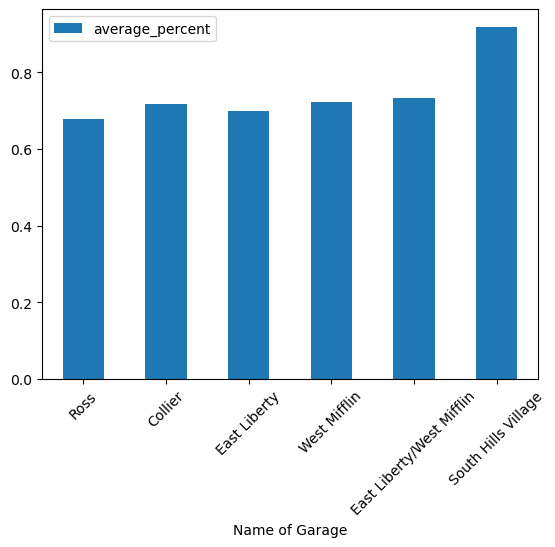

In [217]:
#fall bar graph
sorted_seasons[2].set_index('name_of_garage').plot(kind='bar')
plt.xlabel('Name of Garage')
plt.xticks(rotation=45)
plt.show()

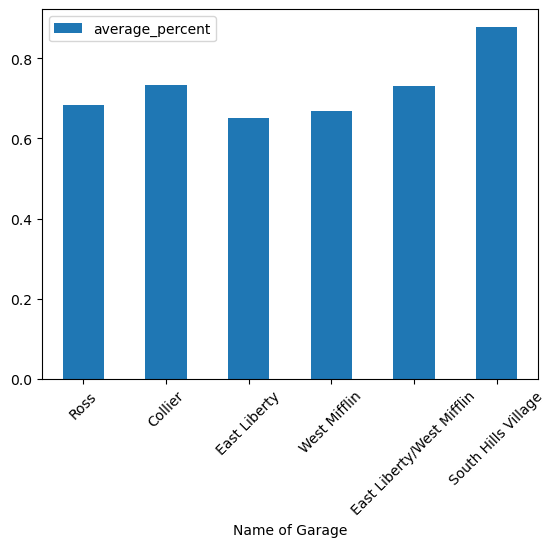

In [219]:
#winter bar graph
sorted_seasons[3].set_index('name_of_garage').plot(kind='bar')
plt.xlabel('Name of Garage')
plt.xticks(rotation=45)
plt.show()

#### South Hills Village  
- located in **Bethel Park**  
- part of the **South Hill** region in Pittsburgh

In [244]:
transport['year_month'] = transport['year_month'].astype(int)

year24_mask = (transport['year_month']//100)==2024
year23_mask = (transport['year_month']//100)==2023
year22_mask = (transport['year_month']//100)==2022
year21_mask = (transport['year_month']//100)==2021

year24 = transport[year24_mask]
year23 = transport[year23_mask]
year22 = transport[year22_mask]
year21 = transport[year21_mask]
# print(year24)
# print(year23)

In [252]:
years = [year24, year23, year22, year21]
sorted_year = []

for df in years:
    current_year_data = {}
    for _, row in df.iterrows():
        garage = row['current_garage']
        #skip rows that is null or with missing value
        if pd.isna(garage):
            continue
        percent = float(row['on_time_percent'])

        #initialize new garage
        if garage not in current_year_data:
            current_year_data[garage] = {'total_percent': 0, 'time': 0}
        
        #upgrade data
        current_year_data[garage]['total_percent'] += percent
        current_year_data[garage]['time'] += 1

    # Convert the current season data into a DataFrame
    current_year_df = pd.DataFrame([
        {'name_of_garage': garage, 'average_percent': data['total_percent'] / data['time']}
        for garage, data in current_year_data.items()
    ])
    
    sorted_year.append(current_year_df)

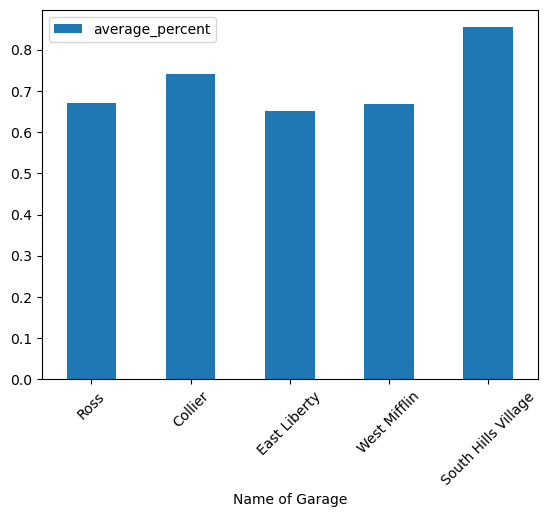

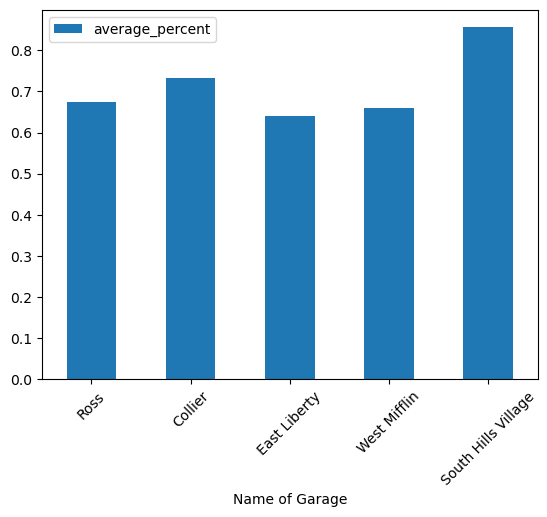

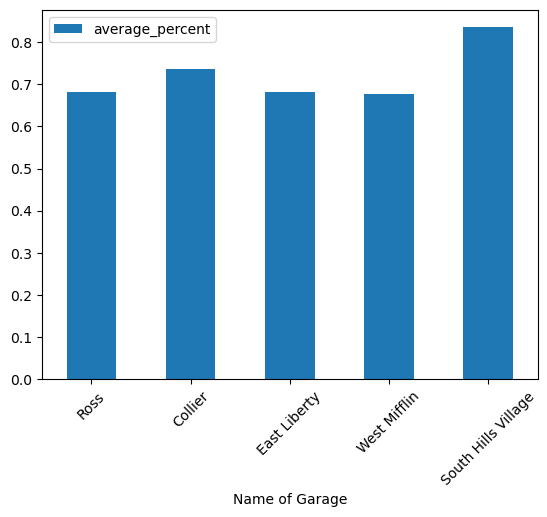

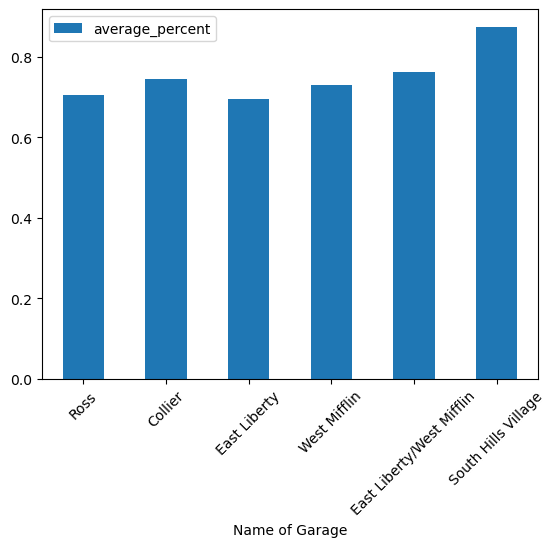

In [258]:
#year24 bar graph
# print(sorted_year[0])
sorted_year[0].set_index('name_of_garage').plot(kind='bar')
plt.xlabel('Name of Garage')
plt.xticks(rotation=45)
plt.show()

#year23 bar graph
# print(sorted_year[1])
sorted_year[1].set_index('name_of_garage').plot(kind='bar')
plt.xlabel('Name of Garage')
plt.xticks(rotation=45)
plt.show()

#year22 bar graph
sorted_year[2].set_index('name_of_garage').plot(kind='bar')
plt.xlabel('Name of Garage')
plt.xticks(rotation=45)
plt.show()

#year21 bar graph
sorted_year[3].set_index('name_of_garage').plot(kind='bar')
plt.xlabel('Name of Garage')
plt.xticks(rotation=45)
plt.show()
